Counter({0: 9900, 1: 100})


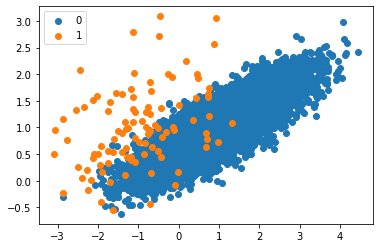

In [14]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()




**Podemos ver o desbalanceamento: 9900 0's e 100 1's .Vamos tentar classificar com os dados ddesbalanceados**

In [15]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

vauc = []
vacc = []
print("Com estratificação\n")
for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    vacc.append(score)
    vauc.append(roc_auc_score(y_test, y_pred))

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('AUC:', roc_auc_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))


from sklearn.model_selection import KFold

cv = KFold(n_splits=10)
vacc = []
print("\nSem Extratificação\n")
for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    vacc.append(score)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('AUC:', roc_auc_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Com estratificação

Accuracy: 0.993
F1 score: 0.7290077813479927
Precision: 0.9964894684052157
AUC: 0.65

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9930    1.0000    0.9965       990
           1     1.0000    0.3000    0.4615        10

    accuracy                         0.9930      1000
   macro avg     0.9965    0.6500    0.7290      1000
weighted avg     0.9930    0.9930    0.9911      1000


Sem Extratificação

Accuracy: 0.995
F1 score: 0.8064341295342805
Precision: 0.9974899598393574
AUC: 0.7222222222222222

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9950    1.0000    0.9975       991
           1     1.0000    0.4444    0.6154         9

    accuracy                         0.9950      1000
   macro avg     0.9975    0.7222    0.8064      1000
weighted avg     0.9950    0.9950    0.9940      1000



Agora vamos comparar os ressultados com os dados balanceados e vamos resolver o balanceamento usando o método de under-sampling NearMiss

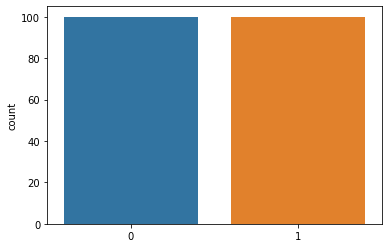

In [16]:
nr = NearMiss()
X, y = nr.fit_sample(X, y)
ax = sns.countplot(x=y)

**Agora com os dados balanceados vamos fazer a classificação novamente**

In [17]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

vauc = []
vacc = []
print("Com estratificação\n")
for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    vacc.append(score)
    vauc.append(roc_auc_score(y_test, y_pred))

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('AUC:', roc_auc_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


from sklearn.model_selection import KFold

cv = KFold(n_splits=10)
vauc = []
vacc = []
print("\nSem Extratificação\n")
for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    vacc.append(score)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
#print('AUC:', roc_auc_score(y_test, y_pred))

Com estratificação

Accuracy: 0.9
F1 score: 0.9
Precision: 0.9
AUC: 0.9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20


Sem Extratificação

Accuracy: 0.85
F1 score: 0.45945945945945943
Precision: 0.5


**Aqui observamos qque com os dados balanceados, o valor do recall esta bem melhor, indicando que aambbas asa classes estão sendo classsificadas com maior precisão do que com os dados desbalanceados. Podemos observar também que , tirando o problema de desbalanceamento, o método  com extratificação apresennta melhores medidas do que o sem extratificação **